<a href="https://colab.research.google.com/github/Srilekha-03/COSC-Git-and-GitHub-Bootcamp/blob/main/Copy_of_160122729009(ML_AS_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Roll number : 160122729009
Data set Name : Credit Car Prediction Dataset

Link : https://www.kaggle.com/datasets/tanayatipre/car-price-prediction-dataset

'Credit Car Prediction Dataset'has both train and test datsets,in  which train datset has 29165 rows x  20 features and test datset has 7292 rows x 20 features respectively.The dataset contains a mix of categorical and numerical features.The "Is high risk" column appears to be the target variable(Dependent variable). Since it's a binary variable (0 or 1), this suggests a classification problem.Here are the classification algorithms implemented in the code:

Logistic Regression
Decision Tree Classifier
Random Forest Classifier
AdaBoost Classifier
Gradient Boosting Classifier
K-Nearest Neighbors Classifier
Support Vector Classifier (SVC)
Gaussian Naive Bayes Classifier
Multi-Layer Perceptron Classifier (Neural Network)
Linear Discriminant Analysis
Quadratic Discriminant Analysis.





**LOADING TRAINING DATA**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv('train_data.csv')
print(data)

            ID Gender Has a car Has a property  Children count    Income  \
0      5037048      M         Y              Y               0  135000.0   
1      5044630      F         Y              N               1  135000.0   
2      5079079      F         N              Y               2  180000.0   
3      5112872      F         Y              Y               0  360000.0   
4      5105858      F         N              N               0  270000.0   
...        ...    ...       ...            ...             ...       ...   
29160  5067139      F         N              Y               0  112500.0   
29161  5029193      F         N              Y               1  135000.0   
29162  5047710      F         N              Y               0   76500.0   
29163  5009886      F         N              Y               0  157500.0   
29164  5062632      F         N              Y               0  585000.0   

          Employment status                Education level  \
0                   Worki

**CONVERTING ALL THE STRING CATEGORICAL FEATURES INTO NUMERICAL(lABEL ENCODER)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Gender', 'Has a car', 'Has a property', 'Employment status',
                     'Education level', 'Marital status', 'Dwelling', 'Job title']

label_encoder = LabelEncoder()


for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

print(data)



            ID  Gender  Has a car  Has a property  Children count    Income  \
0      5037048       1          1               1               0  135000.0   
1      5044630       0          1               0               1  135000.0   
2      5079079       0          0               1               2  180000.0   
3      5112872       0          1               1               0  360000.0   
4      5105858       0          0               0               0  270000.0   
...        ...     ...        ...             ...             ...       ...   
29160  5067139       0          0               1               0  112500.0   
29161  5029193       0          0               1               1  135000.0   
29162  5047710       0          0               1               0   76500.0   
29163  5009886       0          0               1               0  157500.0   
29164  5062632       0          0               1               0  585000.0   

       Employment status  Education level  Marital 

**CHECKING FOR NULL VALUES**

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

print(missing_values[missing_values > 0])


Series([], dtype: int64)


**HANDLING OUTLIERS AND FEATURES SCALING FOR ALL THE FEATURES OTHER THAN(non-ordinal categorical and binary features)**

In [ ]:
#HANDLING OUTLIERS AND FEATURES SCALING FOR ALL THE FEATURES OTHER THAN non-ordinal categorical and binary features
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

robust_scaler = RobustScaler()

numerical_features = ['ID', 'Children count', 'Income', 'Age', 'Employment length', 'Family member count', 'Account age']

data[numerical_features] = robust_scaler.fit_transform(data[numerical_features])

standard_scaler = StandardScaler()

numerical_features = ['Children count', 'Income', 'Age', 'Employment length', 'Family member count', 'Account age']

data[numerical_features] = standard_scaler.fit_transform(data[numerical_features])

print(data)


             ID  Gender  Has a car  Has a property  Children count    Income  \
0     -0.518283       1          1               1       -0.580682 -0.511700   
1     -0.413822       0          1               0        0.767264 -0.511700   
2      0.060800       0          0               1        2.115210 -0.067947   
3      0.526384       0          1               1       -0.580682  1.707062   
4      0.429748       0          0               0       -0.580682  0.819558   
...         ...     ...        ...             ...             ...       ...   
29160 -0.103703       0          0               1       -0.580682 -0.733576   
29161 -0.626505       0          0               1        0.767264 -0.511700   
29162 -0.371387       0          0               1       -0.580682 -1.088578   
29163 -0.892508       0          0               1       -0.580682 -0.289823   
29164 -0.165799       0          0               1       -0.580682  3.925824   

       Employment status  Education lev

**SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split


X = data.drop(columns=['Is high risk'])
y = data['Is high risk']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (23332, 19) (23332,)
Testing set shape: (5833, 19) (5833,)


**APPLYING ALL THE CLASSIFICATION ALGORITHMS AND PRINTING THE PERFORMANCE METRICS(mentioned in the description)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


# Define a list of classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    MLPClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

# Define performance metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-Score': f1_score
}

# Iterate over classifiers
for classifier in classifiers:
    classifier_name = classifier.__class__.__name__
    print(f"Evaluating {classifier_name}...")

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = classifier.predict(X_test)

    # Evaluate performance metrics
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        print(f"{metric_name}: {metric_value:.4f}")

    print("="*50)


Evaluating LogisticRegression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9853
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Evaluating DecisionTreeClassifier...
Accuracy: 0.9717
Precision: 0.1238
Recall: 0.1512
F1-Score: 0.1361
Evaluating RandomForestClassifier...
Accuracy: 0.9832
Precision: 0.2692
Recall: 0.0814
F1-Score: 0.1250
Evaluating AdaBoostClassifier...
Accuracy: 0.9853
Precision: 0.5000
Recall: 0.0116
F1-Score: 0.0227
Evaluating GradientBoostingClassifier...
Accuracy: 0.9842
Precision: 0.2500
Recall: 0.0349
F1-Score: 0.0612
Evaluating KNeighborsClassifier...
Accuracy: 0.9842
Precision: 0.2857
Recall: 0.0465
F1-Score: 0.0800
Evaluating SVC...
Accuracy: 0.9853
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Evaluating GaussianNB...
Accuracy: 0.9851
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Evaluating MLPClassifier...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.9851
Precision: 0.4545
Recall: 0.0581
F1-Score: 0.1031
Evaluating LinearDiscriminantAnalysis...
Accuracy: 0.9853
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Evaluating QuadraticDiscriminantAnalysis...
Accuracy: 0.0333
Precision: 0.0149
Recall: 0.9884
F1-Score: 0.0293


**COMPARING THE PERFORMANCE OF ALL THE CLASSIFICATION ALGORITHMS USING A PANDAS DATAFRAME AND DATA VISUALIZATION PLOTS.**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division

Performance Metrics:
                               Accuracy  Precision    Recall  F1-Score
LogisticRegression             0.985256   0.000000  0.000000  0.000000
DecisionTreeClassifier         0.969484   0.103448  0.139535  0.118812
RandomForestClassifier         0.983199   0.250000  0.069767  0.109091
AdaBoostClassifier             0.985256   0.500000  0.011628  0.022727
GradientBoostingClassifier     0.984228   0.250000  0.034884  0.061224
KNeighborsClassifier           0.984228   0.285714  0.046512  0.080000
SVC                            0.985256   0.000000  0.000000  0.000000
GaussianNB                     0.985085   0.000000  0.000000  0.000000
MLPClassifier                  0.984399   0.222222  0.023256  0.042105
LinearDiscriminantAnalysis     0.985256   0.000000  0.000000  0.000000
QuadraticDiscriminantAnalysis  0.633293   0.013276  0.325581  0.025513


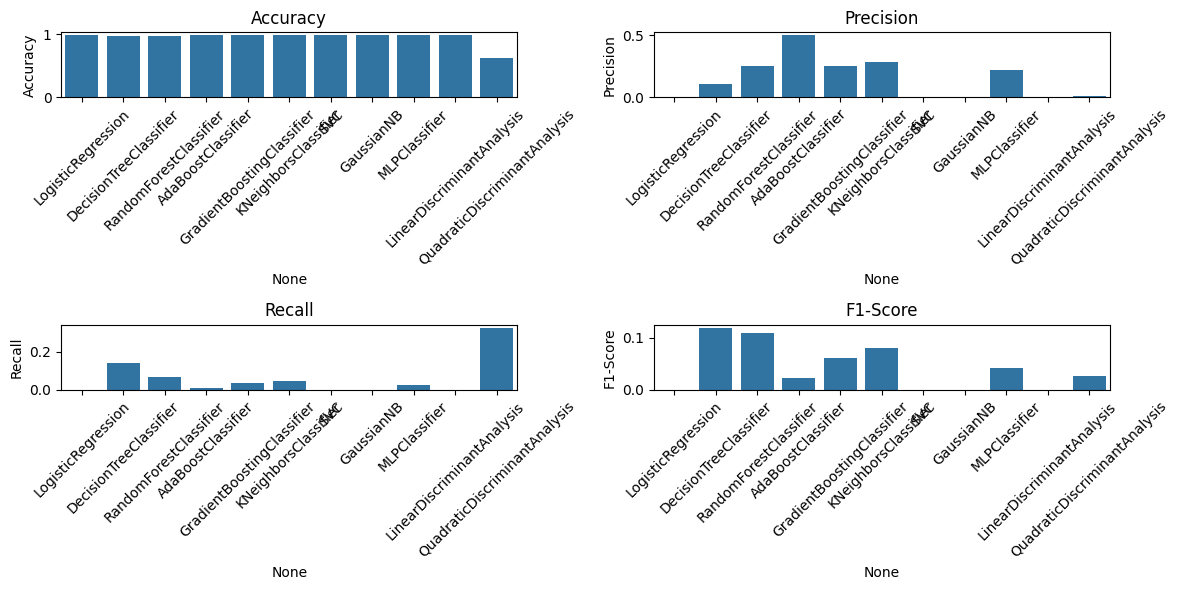

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    MLPClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

# Define performance metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-Score': f1_score
}

# Initialize lists to store metrics for each classifier
classifier_names = []
metrics_data = {metric: [] for metric in metrics}

# Iterate over classifiers
for classifier in classifiers:
    classifier_name = classifier.__class__.__name__
    classifier_names.append(classifier_name)

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = classifier.predict(X_test)

    # Evaluate performance metrics
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        metrics_data[metric_name].append(metric_value)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame(metrics_data, index=classifier_names)

# Print the metrics table
print("Performance Metrics:")
print(metrics_df)

# Create visualizations
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(2, 2, 1)
sns.barplot(x=metrics_df.index, y="Accuracy", data=metrics_df)
plt.title("Accuracy")
plt.xticks(rotation=45)

# Precision plot
plt.subplot(2, 2, 2)
sns.barplot(x=metrics_df.index, y="Precision", data=metrics_df)
plt.title("Precision")
plt.xticks(rotation=45)

# Recall plot
plt.subplot(2, 2, 3)
sns.barplot(x=metrics_df.index, y="Recall", data=metrics_df)
plt.title("Recall")
plt.xticks(rotation=45)

# F1-score plot
plt.subplot(2, 2, 4)
sns.barplot(x=metrics_df.index, y="F1-Score", data=metrics_df)
plt.title("F1-Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**LOADING THE TEST DATASET**

In [ ]:
test_data= pd.read_csv('test_data.csv')
print(test_data)

           ID Gender Has a car Has a property  Children count    Income  \
0     5091261      F         N              Y               0  202500.0   
1     5096963      M         Y              N               0  675000.0   
2     5087880      F         N              N               0  234000.0   
3     5021949      F         Y              Y               0  445500.0   
4     5105705      F         Y              N               0  225000.0   
...       ...    ...       ...            ...             ...       ...   
7287  5115415      F         Y              Y               0  135000.0   
7288  5068826      F         Y              Y               0  157500.0   
7289  5026088      F         N              Y               0   67500.0   
7290  5142701      F         Y              N               0   95850.0   
7291  5022903      F         N              Y               1  135000.0   

         Employment status                Education level  Marital status  \
0            State ser

****



**CONVERTING ALL THE STRING CATEGORICAL FEATURES INTO NUMERICAL(lABEL ENCODER)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Gender', 'Has a car', 'Has a property', 'Employment status',
                     'Education level', 'Marital status', 'Dwelling', 'Job title']

label_encoder = LabelEncoder()


for column in columns_to_encode:
    test_data[column] = label_encoder.fit_transform(test_data[column])

print(test_data)

           ID  Gender  Has a car  Has a property  Children count    Income  \
0     5091261       0          0               1               0  202500.0   
1     5096963       1          1               0               0  675000.0   
2     5087880       0          0               0               0  234000.0   
3     5021949       0          1               1               0  445500.0   
4     5105705       0          1               0               0  225000.0   
...       ...     ...        ...             ...             ...       ...   
7287  5115415       0          1               1               0  135000.0   
7288  5068826       0          1               1               0  157500.0   
7289  5026088       0          0               1               0   67500.0   
7290  5142701       0          1               0               0   95850.0   
7291  5022903       0          0               1               1  135000.0   

      Employment status  Education level  Marital status  Dwell

**CHECKING FOR MISSING VALUES**

In [ ]:
missing_values = test_data.isnull().sum()

print(missing_values[missing_values > 0])


Series([], dtype: int64)


**HANDLING OUTLIERS AND FEATURES SCALING FOR ALL THE FEATURES OTHER THAN(non-ordinal categorical and binary features)**

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

robust_scaler = RobustScaler()

numerical_features = ['ID', 'Children count', 'Income', 'Age', 'Employment length', 'Family member count', 'Account age']

test_data[numerical_features] = robust_scaler.fit_transform(test_data[numerical_features])

standard_scaler = StandardScaler()

numerical_features = ['Children count', 'Income', 'Age', 'Employment length', 'Family member count', 'Account age']

test_data[numerical_features] = standard_scaler.fit_transform(test_data[numerical_features])

print(test_data)

            ID  Gender  Has a car  Has a property  Children count    Income  \
0     0.296849       0          0               1       -0.575595  0.161031   
1     0.374331       1          1               0       -0.575595  4.735559   
2     0.250906       0          0               0       -0.575595  0.465999   
3    -0.645002       0          1               1       -0.575595  2.513645   
4     0.493122       0          1               0       -0.575595  0.378866   
...        ...     ...        ...             ...             ...       ...   
7287  0.625068       0          1               1       -0.575595 -0.492473   
7288 -0.008010       0          1               1       -0.575595 -0.274638   
7289 -0.588759       0          0               1       -0.575595 -1.145977   
7290  0.995845       0          1               0       -0.575595 -0.871505   
7291 -0.632038       0          0               1        0.767951 -0.492473   

      Employment status  Education level  Marital s

**SPITTING THE TEST DATSET**

In [ ]:
from sklearn.model_selection import train_test_split


X = test_data.drop(columns=['Is high risk'])
y = test_data['Is high risk']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5833, 19) (5833,)
Testing set shape: (1459, 19) (1459,)


**APPLYING ALL THE CLASSIFICATION ALGORITHMS AND PRINTING THE PERFORMANCE METRICS(mentioned in the description) FOR TEST DATASET**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


# Define a list of classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    MLPClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

# Define performance metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-Score': f1_score
}

# Iterate over classifiers
for classifier in classifiers:
    classifier_name = classifier.__class__.__name__
    print(f"Evaluating {classifier_name}...")

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = classifier.predict(X_test)

    # Evaluate performance metrics
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        print(f"{metric_name}: {metric_value:.4f}")

    print("="*50)


Evaluating LogisticRegression...
Accuracy: 0.9788
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Evaluating DecisionTreeClassifier...
Accuracy: 0.9650
Precision: 0.1429
Recall: 0.1290
F1-Score: 0.1356
Evaluating RandomForestClassifier...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9788
Precision: 0.5000
Recall: 0.0323
F1-Score: 0.0606
Evaluating AdaBoostClassifier...
Accuracy: 0.9788
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Evaluating GradientBoostingClassifier...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9760
Precision: 0.2500
Recall: 0.0645
F1-Score: 0.1026
Evaluating KNeighborsClassifier...
Accuracy: 0.9788
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Evaluating SVC...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9788
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Evaluating GaussianNB...
Accuracy: 0.9774
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Evaluating MLPClassifier...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9781
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Evaluating LinearDiscriminantAnalysis...
Accuracy: 0.9788
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Evaluating QuadraticDiscriminantAnalysis...
Accuracy: 0.1268
Precision: 0.0230
Recall: 0.9677
F1-Score: 0.0450


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


**COMPARING THE PERFORMANCE OF ALL THE CLASSIFICATION ALGORITHMS USING A PANDAS DATAFRAME AND DATA VISUALIZATION PLOTS FOR THE TEST DATASET**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division

TESTING DATASET
Performance Metrics:
                               Accuracy  Precision    Recall  F1-Score
LogisticRegression             0.978753   0.000000  0.000000  0.000000
DecisionTreeClassifier         0.965045   0.166667  0.161290  0.163934
RandomForestClassifier         0.978753   0.500000  0.032258  0.060606
AdaBoostClassifier             0.978753   0.000000  0.000000  0.000000
GradientBoostingClassifier     0.976696   0.285714  0.064516  0.105263
KNeighborsClassifier           0.978753   0.000000  0.000000  0.000000
SVC                            0.978753   0.000000  0.000000  0.000000
GaussianNB                     0.977382   0.000000  0.000000  0.000000
MLPClassifier                  0.979438   1.000000  0.032258  0.062500
LinearDiscriminantAnalysis     0.978753   0.000000  0.000000  0.000000
QuadraticDiscriminantAnalysis  0.126799   0.023024  0.967742  0.044978


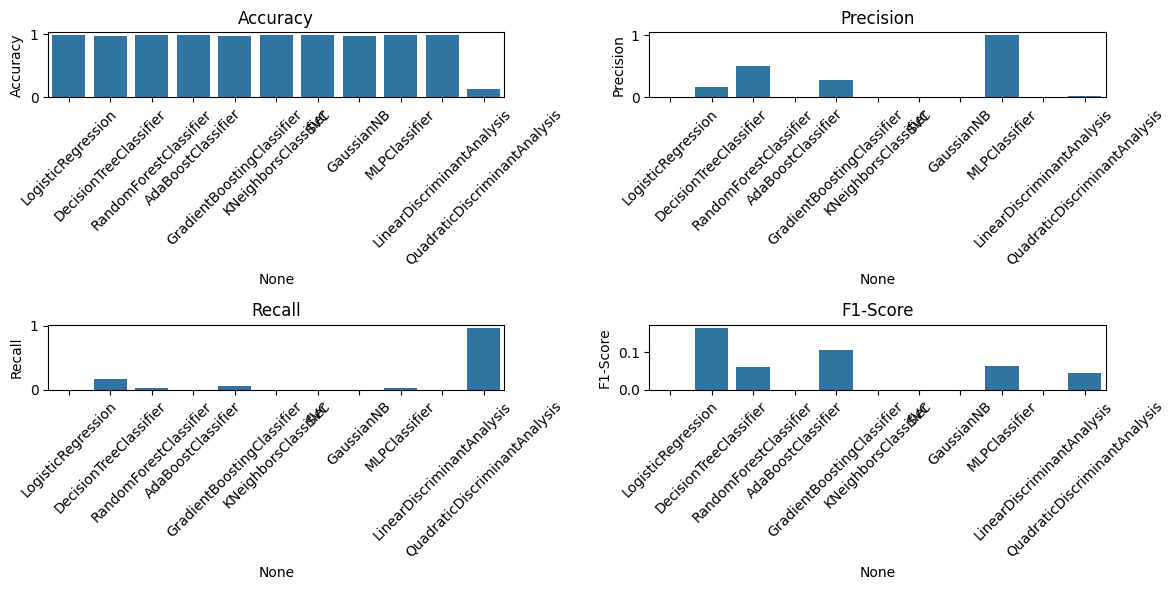

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    MLPClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

# Define performance metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-Score': f1_score
}

# Initialize lists to store metrics for each classifier
classifier_names = []
metrics_data = {metric: [] for metric in metrics}

# Iterate over classifiers
for classifier in classifiers:
    classifier_name = classifier.__class__.__name__
    classifier_names.append(classifier_name)

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = classifier.predict(X_test)

    # Evaluate performance metrics
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        metrics_data[metric_name].append(metric_value)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame(metrics_data, index=classifier_names)
print("TESTING DATASET")
# Print the metrics table
print("Performance Metrics:")
print(metrics_df)

# Create visualizations
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(2, 2, 1)
sns.barplot(x=metrics_df.index, y="Accuracy", data=metrics_df)
plt.title("Accuracy")
plt.xticks(rotation=45)

# Precision plot
plt.subplot(2, 2, 2)
sns.barplot(x=metrics_df.index, y="Precision", data=metrics_df)
plt.title("Precision")
plt.xticks(rotation=45)

# Recall plot
plt.subplot(2, 2, 3)
sns.barplot(x=metrics_df.index, y="Recall", data=metrics_df)
plt.title("Recall")
plt.xticks(rotation=45)

# F1-score plot
plt.subplot(2, 2, 4)
sns.barplot(x=metrics_df.index, y="F1-Score", data=metrics_df)
plt.title("F1-Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
